In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [2]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [3]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [4]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

<BarContainer object of 2 artists>

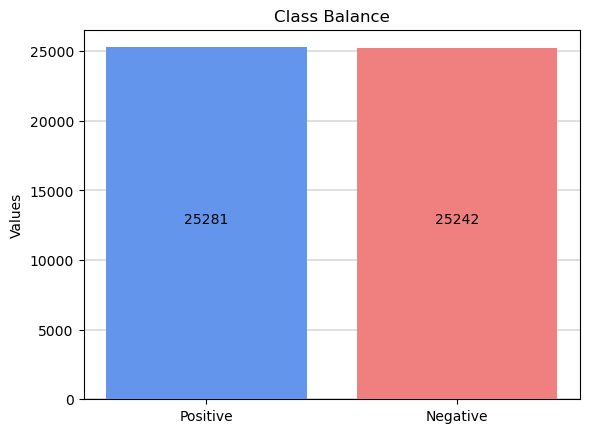

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',zorder=4)

# Count the values in the 'Label' column
count = df['Label'].value_counts()
x = ["Positive", "Negative"]  # Custom labels for class balance plot
y = [count[1], count[0]]
addlabels(x,y)
plt.ylabel("Values")
plt.title('Class Balance')
plt.grid(color='dimgray', linewidth=0.3, axis='y',zorder=0)
plt.bar(x,y, color= ['cornflowerblue', 'lightcoral'], zorder=3)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF trigram(3,3)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(3,3), max_df=0.7, max_features=10000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [7]:
#Split data 90% data train and 10% data test
x_trigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_trigram,label, test_size = 0.1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45470, 5170) (45470,)
(5053, 5170) (5053,)


In [8]:
y_train

14627    1
48402    0
15695    0
7076     1
22581    1
        ..
18335    0
49355    1
44377    0
20501    1
23037    0
Name: Label, Length: 45470, dtype: int64

In [9]:
x_train

0     1     2     3     4     5     6     7     8     9     ...  5160  \
14627   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
48402   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
15695   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7076    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
22581   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
18335   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
49355   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
44377   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
20501   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
23037   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       5161  5162  5163  5164  5165  5166  5167  5168  5169  
14627   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
48402   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
15695   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7076    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
22581   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
18335   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
49355   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
44377   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
20501   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
23037   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[45470 rows x 5170 columns]

In [10]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [11]:
x_train.shape

(45470, 1, 5170)

In [12]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d               │ (None, 1, 5170)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     2,713,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,717,249 (10.37 MB)

 Trainable params: 2,717,249 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.6547 - loss: 0.6033 - val_accuracy: 0.7283 - val_loss: 0.5093
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.7212 - loss: 0.5103 - val_accuracy: 0.7273 - val_loss: 0.5041
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.7279 - loss: 0.4967 - val_accuracy: 0.7273 - val_loss: 0.5051
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.7255 - loss: 0.4919 - val_accuracy: 0.7263 - val_loss: 0.5053
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 48s 33ms/step - accuracy: 0.7272 - loss: 0.4908 - val_accuracy: 0.7267 - val_loss: 0.5078


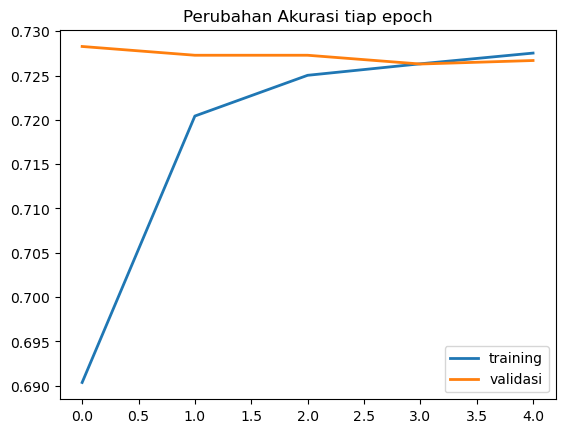

158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.671364  0.887084  0.764294      2524
           1   0.834109  0.566627  0.674829      2529

    accuracy                       0.726697      5053
   macro avg   0.752737  0.726856  0.719562      5053
weighted avg   0.752817  0.726697  0.719518      5053



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_1             │ (None, 1, 5170)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │     2,713,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,717,249 (10.37 MB)

 Trainable params: 2,717,249 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 56s 34ms/step - accuracy: 0.6311 - loss: 0.6088 - val_accuracy: 0.7281 - val_loss: 0.5102
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.7207 - loss: 0.5116 - val_accuracy: 0.7277 - val_loss: 0.5030
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.7219 - loss: 0.5027 - val_accuracy: 0.7275 - val_loss: 0.5055
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.7260 - loss: 0.4951 - val_accuracy: 0.7295 - val_loss: 0.5064
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 47s 33ms/step - accuracy: 0.7284 - loss: 0.4896 - val_accuracy: 0.7297 - val_loss: 0.5072


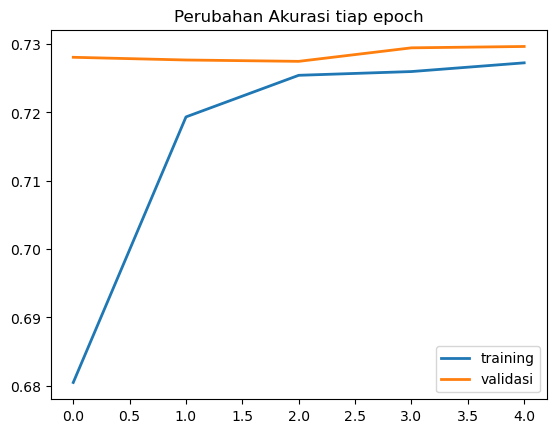

158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.676309  0.879952  0.764807      2524
           1   0.828717  0.579676  0.682178      2529

    accuracy                       0.729666      5053
   macro avg   0.752513  0.729814  0.723492      5053
weighted avg   0.752588  0.729666  0.723452      5053



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spatial_dropout1d_2             │ (None, 1, 5170)        │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │     2,713,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,717,249 (10.37 MB)

 Trainable params: 2,717,249 (10.37 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 53s 33ms/step - accuracy: 0.6617 - loss: 0.6063 - val_accuracy: 0.7273 - val_loss: 0.5085
Epoch 2/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 46s 32ms/step - accuracy: 0.7175 - loss: 0.5118 - val_accuracy: 0.7281 - val_loss: 0.5043
Epoch 3/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.7259 - loss: 0.4994 - val_accuracy: 0.7277 - val_loss: 0.5029
Epoch 4/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.7254 - loss: 0.4915 - val_accuracy: 0.7259 - val_loss: 0.5057
Epoch 5/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.7304 - loss: 0.4886 - val_accuracy: 0.7297 - val_loss: 0.5064
Epoch 6/10
1421/1421 ━━━━━━━━━━━━━━━━━━━━ 45s 32ms/step - accuracy: 0.7291 - loss: 0.4854 - val_accuracy: 0.7289 - val_loss: 0.5085


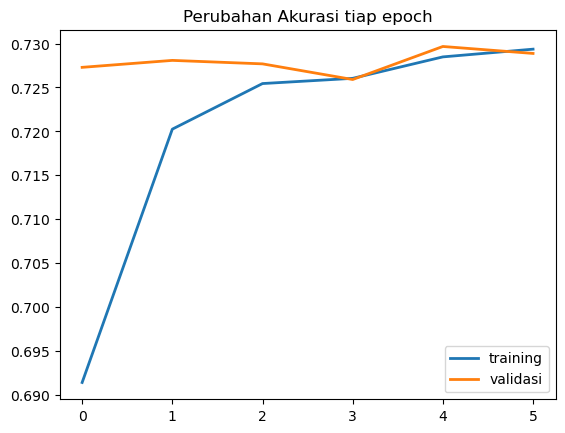

158/158 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.674320  0.884311  0.765170      2524
           1   0.832473  0.573745  0.679307      2529

    accuracy                       0.728874      5053
   macro avg   0.753396  0.729028  0.722238      5053
weighted avg   0.753475  0.728874  0.722196      5053



In [14]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [15]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.7284121643907909
Average Precision : 0.8317663222836919
Average Recall    : 0.5733491498616053
Average F1-Score  : 0.678771388155205
